### [ 미국에서 맛본 라면의 DATASET  - Matplotlib ]
- 데이터셋 : 
- 미국 라면 데이터에서 STAR별 Brand 분석
- 각 STAR별 Variety 공통점 분석
- 미국에서 라면가게를 차리게 되면 가져야할 특징

- 과정
    * 데이터 파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인

    * 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 => 실제 데이터와 타입 일치

    * 데이터 가공 : 분석하고자하는 데이터 형태
        - 행 인덱스 처리 : 멀티인덱스/컬럼 => 행인덱스/행인덱스 초기화(판단은 알아서 잘 하기!)
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 => 연속 -> 범주형, 범주형 -> 연속형

    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리



In [856]:
# [1] 모듈 준비
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [857]:
# [2] 데이터 준비
file_name='ramen_data.csv'
ramen_data=pd.read_csv(file_name)
ramen_data

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN
...,...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [858]:
# [2-1] 중복값 확인하기
ramen_data.duplicated().sum()

0

In [859]:
# [2-2] 결측치 확인하기
US_RD.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
dtype: int64

In [860]:
ramen_data['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4650 entries, 0 to 4649
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
4650 non-null   object
dtypes: object(1)
memory usage: 36.5+ KB


In [861]:
# [2-3] 미국 라면 추출하기

# 미국 라면을 추출하기 위해 인덱스 확인
ramen_data.columns

# Country 컬럼에서 미국 찾기
ramen_data['Country'].value_counts() #United States와 USA 있음

# USA 데이터를 United States로 고쳐주기
ramen_data[ramen_data['Country']=='United States']['Country'] # 개수 722개
ramen_data[ramen_data['Country']=='United States'] # 바꾸고 확인 후 723개 (잘 바뀜)

,Review #,Brand,Variety,Style,Country,Stars,T
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN
22,4628,Nongshim,Bowl Noodles Savory Chicken Flavor,Bowl,United States,4,NaN
25,4625,Samyang Foods,Tangle Bulgogi Alfredo Tangluccine,Pack,United States,5,NaN
29,4621,Tapatio,Ramen Noodle Soup Birria Flavor,Bowl,United States,4.5,NaN
...,...,...,...,...,...,...,...
4586,64,Sapporo Ichiban,Chicken Flavor,Pack,United States,3.5,NaN
4616,34,Maruchan,Ramen Noodle Soup Shrimp,Pack,United States,2,NaN
4627,23,Nissin,Top Ramen Creamy Chicken,Pack,United States,4.5,NaN
4640,10,Smack,Vegetable Beef,Pack,United States,1.5,NaN


In [862]:
ramen_data[ramen_data['Country']=='USA']

,Review #,Brand,Variety,Style,Country,Stars,T
1916,2734,Lipton,Soup Secrets Extra Noodle Soup Mix With Real C...,Box,USA,3.25,NaN


In [863]:
ramen_data.loc[1916,'Country'] = 'United States'

In [864]:
# [3] 데이터 전처리
# [3-1] 필요 없는 컬럼 삭제(처음에 Review #,Style 컬럼도 삭제를 했으나 같은 라면이라도 
#                         포장방법과 같은 라면을 두번 먹은 경우도 존재해 삭제 불가.) 
     
ramen_data.drop(columns=['T'],inplace=True)
ramen_data # 진짜 필요한 데이터


,Review #,Brand,Variety,Style,Country,Stars
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5
...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [865]:
# [3-2] Country가 미국 데이터만 뽑아내기
US_RD=ramen_data[ramen_data['Country']=='United States'].copy()

# 이제 다 USA 데이터이기 떄문에 Country열 삭제해도 됨.
US_RD.drop(columns=['Country'],inplace=True)

In [866]:
# [3-3] Star 컬럼에서 이상치 확인하기.
US_RD_idx=US_RD['Stars'].value_counts().index
US_RD_idx

Index(['5', '3.75', '3.5', '4', '4.5', '3', '3.25', '4.25', '2', '2.75', '0',
       '2.5', '4.75', '1.5', '1', '0.25', '1.75', '2.25', '1.25', '0.5',
       '4.25/5', '5/5', '5/4', '5/2.5', '4.5/5', '0.75', '4/4', '3.5/2.5',
       'NS', '35', '2.125'],
      dtype='object', name='Stars')

In [867]:
# 인덱스에 NS 값 확인 해보기 위해 리뷰 번호 블로그에 쳐보기
for i in US_RD_idx:
    print(f'---{i}---')
    print(f"{ramen_data[ramen_data['Stars']==i]}\n\n")

---5---
      Review #            Brand                               Variety Style  \
0         4650          Jasmine   XXL Bihun Segera Penang White Curry  Pack   
1         4649          Indomie  Mi Instan Mi Keriting Goreng Spesial  Pack   
4         4646    Samyang Foods                         Samyand Ramen  Pack   
7         4643         Best Wok    Corn Bihun Hot & Spicy Fried Bihun  Pack   
8         4642        NoodleMix   3 Flavors In 1 Noodle – Rice Noodle   Box   
...        ...              ...                                   ...   ...   
4600        50          Indomie                             Mi Goreng  Pack   
4603        47          Indomie      Mi Goreng Jumbo Barbecue Chicken  Pack   
4605        45          Indomie                        Mi Goreng Sate  Pack   
4622        28           Nissin                          Chikin Ramen  Pack   
4637        13  Sapporo Ichiban                             Chow Mein  Pack   

            Country Stars  
0          Mala

In [868]:
# 인덱스에 NS 값 확인 해보기 위해 리뷰 번호 블로그에 쳐보기
US_RD[US_RD['Stars']=='NS'] # 얘는 4점임


,Review #,Brand,Variety,Style,Stars
1217,3433,Base Foods,Base Noodles,Pack,NS


In [869]:
US_RD[US_RD['Stars']=='2.125'] # 값이 잘못 입력됨.

,Review #,Brand,Variety,Style,Stars
4316,334,Nissin,Big Cup Noodles Beef,Cup,2.125


In [870]:
############################
# Star 값 바꿔주는 함수 만들기
def Star_change(x,y):
    US_RD.loc[US_RD[US_RD['Stars']==x].index[0],'Stars'] = y
############################
    


In [871]:
# 값 이상한거 블로그 찾아서 다 고쳐주기

# change_list= [ '4.25/5', '5/5', '5/4', '5/2.5', '4.5/5', '4/4', '3.5/2.5','NS', '35' ] # '2.125'는 바꿔줬으니 빼줌
# result_list= [ '4.25'  , '5'     ,'4',   '2.5',   '4.5'   ,'5'   ,'3.5'  ,'3' ,'3.5'] 
Star_change('4.25/5','4.25')
Star_change('5/5','5')
Star_change('5/4','4')
Star_change('5/2.5','2.5')
Star_change('4.5/5','4.5')
Star_change('4/4','5')
Star_change('3.5/2.5','3.5')
Star_change('NS','4')
Star_change('35','3.5')
Star_change('4.25/5','4.25')



In [872]:
# 고쳐준 값 확인하기

US_RD['Stars'].value_counts().index

Index(['5', '3.75', '3.5', '4', '4.5', '3.25', '3', '4.25', '2', '2.75', '0',
       '2.5', '4.75', '1.5', '1', '0.25', '1.75', '2.25', '1.25', '0.5',
       '0.75', '2.125'],
      dtype='object', name='Stars')

In [873]:
# [4] Star 데이터 Star_value로 범주화

# [4-1] Star 데이터 float으로 값 바꿔주기
Stars_val=US_RD['Stars'].astype('float')
Stars_val.describe()

count    723.000000
mean       3.575899
std        1.217180
min        0.000000
25%        3.250000
50%        3.750000
75%        4.500000
max        5.000000
Name: Stars, dtype: float64

In [874]:
# [4-2] Stars_val 추가하고 Stars 컬럼 삭제
US_RD['Stars_val']=Stars_val
US_RD.drop(columns='Stars',inplace=True)
US_RD


,Review #,Brand,Variety,Style,Stars_val
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,5.0
22,4628,Nongshim,Bowl Noodles Savory Chicken Flavor,Bowl,4.0
25,4625,Samyang Foods,Tangle Bulgogi Alfredo Tangluccine,Pack,5.0
29,4621,Tapatio,Ramen Noodle Soup Birria Flavor,Bowl,4.5
...,...,...,...,...,...
4586,64,Sapporo Ichiban,Chicken Flavor,Pack,3.5
4616,34,Maruchan,Ramen Noodle Soup Shrimp,Pack,2.0
4627,23,Nissin,Top Ramen Creamy Chicken,Pack,4.5
4640,10,Smack,Vegetable Beef,Pack,1.5


In [875]:
# [4-3] Stars_val 및 행 인덱스 설정 범주화
US_RD['Stars_val']=pd.cut(US_RD['Stars_val'],bins=[0.0,1.0,2.0,3.0,4.0,5.0],labels=['F','D','C','B','A'],include_lowest=True)
US_RD['Stars_val'].value_counts()
US_RD['Stars_val'].isna().sum()
US_RD1=US_RD.copy()
US_RD.set_index('Stars_val',inplace=True)
US_RD.sort_index(ascending=False,inplace=True)


In [876]:
US_RD1

,Review #,Brand,Variety,Style,Stars_val
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,A
4,4646,Samyang Foods,Samyand Ramen,Pack,A
22,4628,Nongshim,Bowl Noodles Savory Chicken Flavor,Bowl,B
25,4625,Samyang Foods,Tangle Bulgogi Alfredo Tangluccine,Pack,A
29,4621,Tapatio,Ramen Noodle Soup Birria Flavor,Bowl,A
...,...,...,...,...,...
4586,64,Sapporo Ichiban,Chicken Flavor,Pack,B
4616,34,Maruchan,Ramen Noodle Soup Shrimp,Pack,D
4627,23,Nissin,Top Ramen Creamy Chicken,Pack,A
4640,10,Smack,Vegetable Beef,Pack,D


In [877]:
# [4-5] Stars_val 별로 데이터를 살펴본 결과, 오타가 있긴 있었지만 순위에 크게 영향을 주지 않을 수치라서 head(10)값만 추출해서 데이터 분석

for i in ['F','D','C','B','A']:
    print(US_RD.loc[i]['Brand'].value_counts().head(10))

Brand
Annie Chun's       4
Simply Asia        4
Lee Kum Kee        3
Ocean's Halo       2
Snapdragon         2
Panda Signature    2
Roland             2
Lotus Foods        2
Fortune            1
Noodie             1
Name: count, dtype: int64
Brand
Nissin             6
Maruchan           6
Annie Chun's       4
Nongshim           4
Panda Signature    2
Snapdragon         2
Mama Pat's         2
Sapporo Ichiban    2
Koyo               2
Kang Shi Fu        1
Name: count, dtype: int64
Brand
Nissin             22
Maruchan           17
Koyo                3
Goku-Uma            2
Tradition           2
Panda Signature     2
Thai Kitchen        2
Menraku             2
Lotus Foods         2
Simply Food         2
Name: count, dtype: int64
Brand
Nissin                       76
Maruchan                     44
Nongshim                     21
Menraku                      10
Ramen Express By Chef Woo     8
Myojo                         8
Sapporo Ichiban               8
Vite Ramen                    8
Ka

In [878]:
# [5] 등급별로 파이 함수 그리기
# [5-1] 각 등급별 가장 많은 업체 *_US_RD에 저장
A_US_RD=US_RD.loc["A"]['Brand'].value_counts().head(5)
B_US_RD=US_RD.loc["B"]['Brand'].value_counts().head(5)
C_US_RD=US_RD.loc["C"]['Brand'].value_counts().head(5)
D_US_RD=US_RD.loc["D"]['Brand'].value_counts().head(5)
F_US_RD=US_RD.loc["F"]['Brand'].value_counts().head(5)



In [879]:
# 저장된 값 확인
A_US_RD

Brand
Nongshim      30
Nissin        26
Myojo         16
Vite Ramen    15
Maruchan      13
Name: count, dtype: int64

In [880]:
# [5-2] 등급 파이 그리는 함수
def draw_pie(x):
    V=US_RD.loc[x]['Brand'].value_counts().head(5) # 각 등급별 가장 많은 업체 V에 저장
    i=V.index.to_list()  # 시리즈라서
    h=V.values.tolist() # array라서
    explode = [0.1, 0.1, 0.1, 0.1,0.1]
    plt.pie(h,labels=i,autopct='%i%%',explode=explode)
    plt.title(f'{x}등급')
    plt.show()

In [881]:
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
FONT_FILE=r'C:\Windows\Fonts\MalangmalangR.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

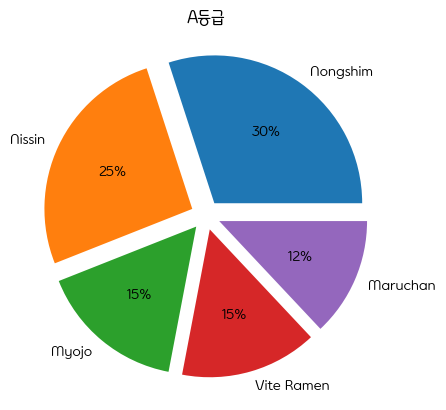

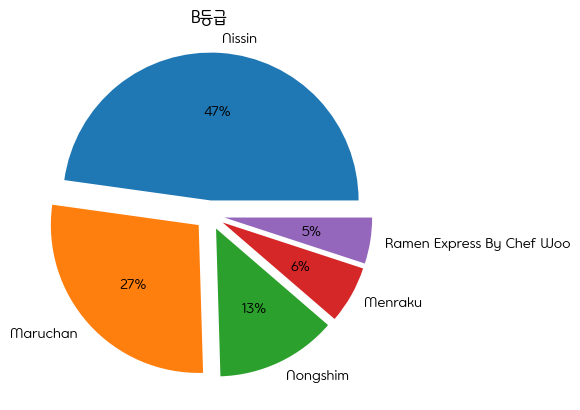

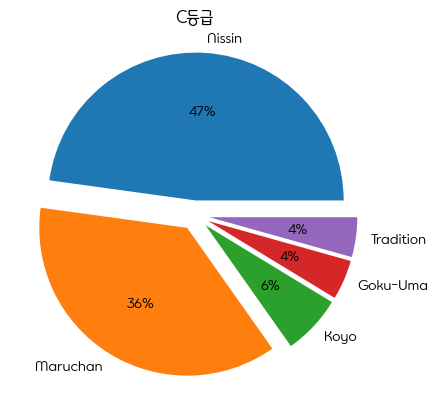

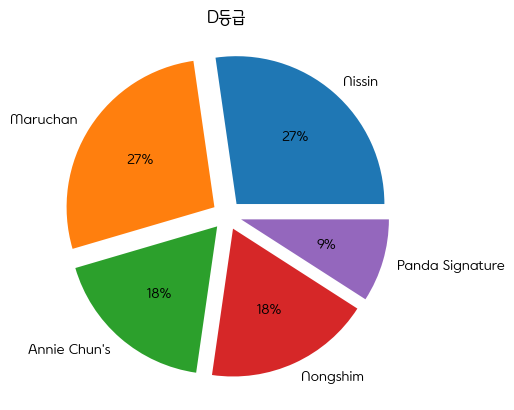

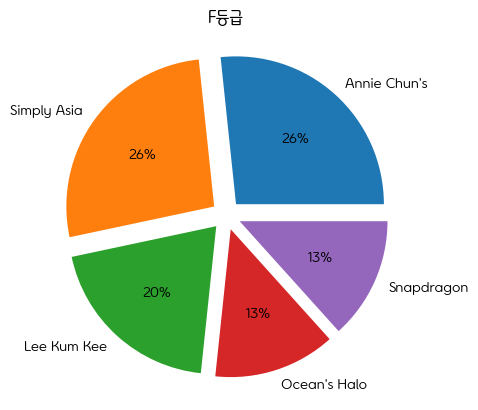

In [882]:
########분석########
# [1] 각 등급별 top 10 업체 시각화 

for i in ['A','B','C','D','F']:
    draw_pie(i)

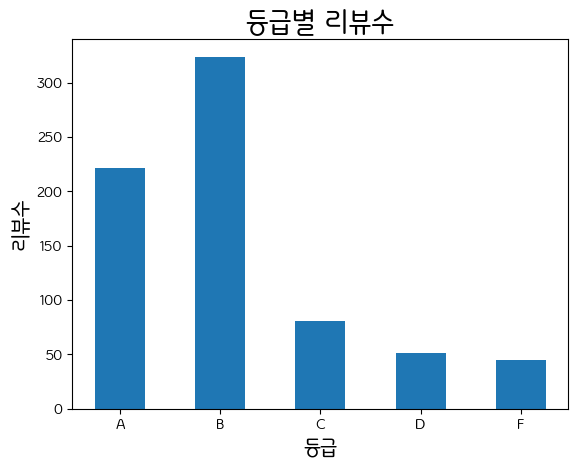

In [883]:
# [2] A등급의 1,2등 , F등급의 1,2등 라면 특징을 찾아서 미국에서 팔 라면 만들기
# [2-1] 등급별 리뷰수 체크
total_list=[]
for i in US_RD1['Stars_val'].unique():
    total_list.append(len(US_RD1[US_RD1['Stars_val']==i].index))

total_list

plt.bar(US_RD1['Stars_val'].unique(),total_list,width=0.5)
plt.xlabel('등급',fontsize=15)
plt.ylabel('리뷰수',fontsize=15)
plt.title('등급별 리뷰수',fontsize=20)
plt.show()

# 이 사람이 대부분 점수를 후하게 줬다는 것을 알 수 있음.
# A,B 등급에 존재하는 업체들의 라면을 분석해서 공통점 찾아보기.
# D,F 등급이 상대적으로 표본이 적기 때문에 등급별로 분석하기.

In [884]:
## 등급별 라면 특징 분석
from wordcloud import WordCloud

In [885]:
## 각각의 키워드들 담고 wordcloud 함수 만들기


def print_keyword(x,y):
    top_keyword = []
    US_RD2=US_RD1[US_RD1['Brand'] == x]
    for i in US_RD2.loc[US_RD2['Stars_val']==y]['Variety']:
        a=i.split(' ')
        for h in a:
            top_keyword.append(h)

    # 키워드 삭제
    while 'Ramen' in top_keyword:
        top_keyword.remove('Ramen')
    while 'Noodle' in top_keyword:
        top_keyword.remove('Noodle')
    while 'Noodles' in top_keyword:
        top_keyword.remove('Noodles')
    while 'Soup' in top_keyword:
        top_keyword.remove('Soup')
    while 'Style' in top_keyword:
        top_keyword.remove('Style')

    text = ' '.join(top_keyword)

    wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='hsv').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{x}',fontsize=30)
    plt.axis('off')
    plt.show()

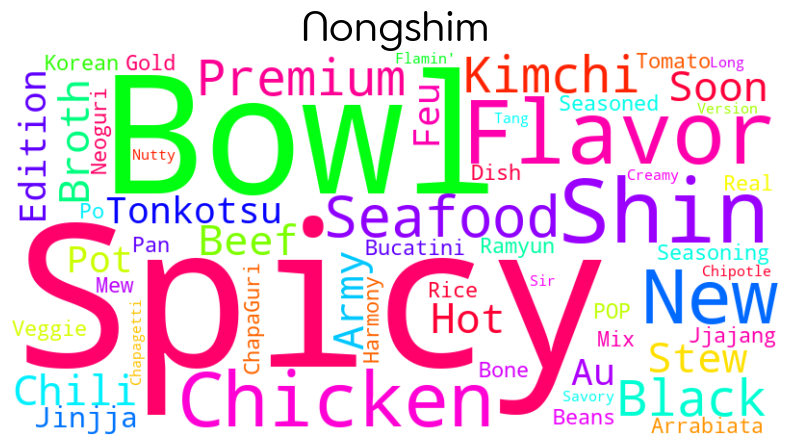

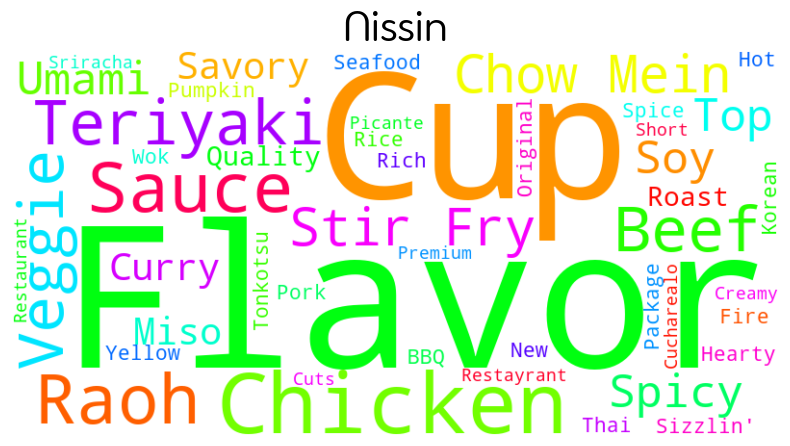

(None, None)

In [886]:
print_keyword('Nongshim','A'),print_keyword('Nissin','A')

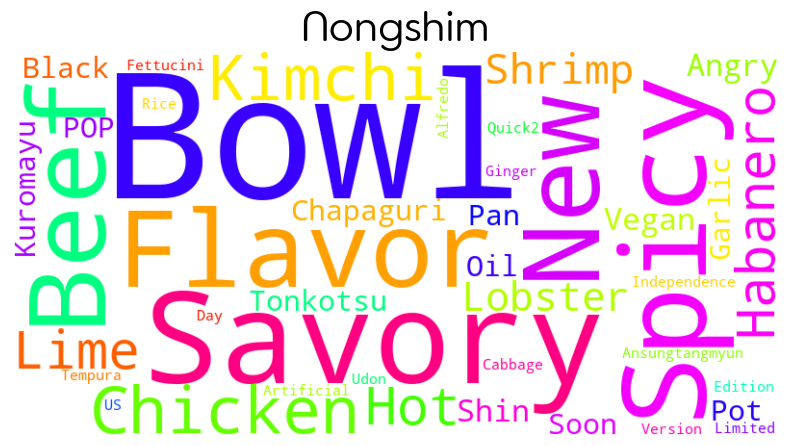

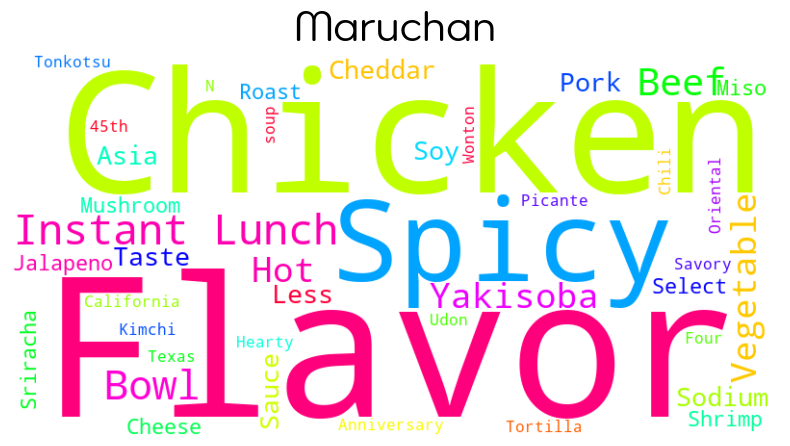

(None, None)

In [887]:
print_keyword('Nongshim','B'),print_keyword('Maruchan','B')

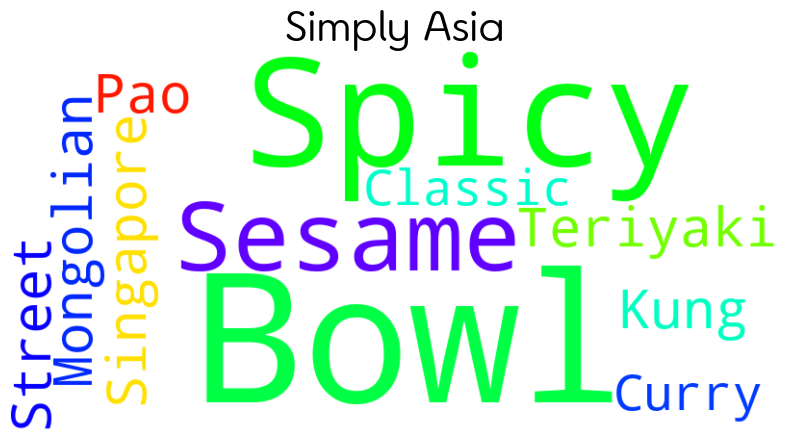

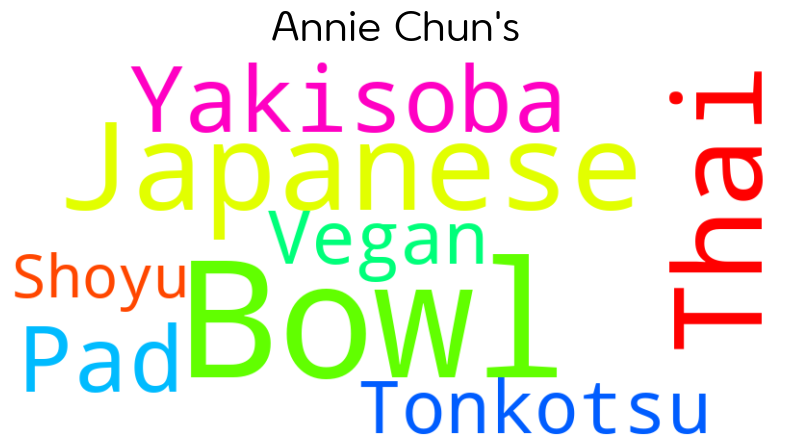

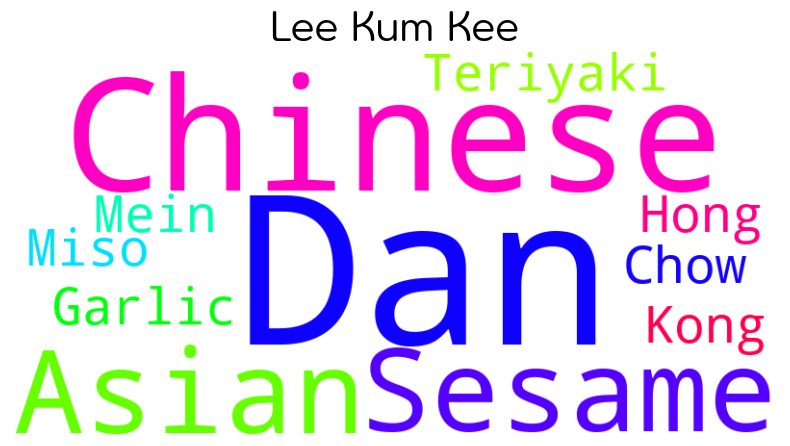

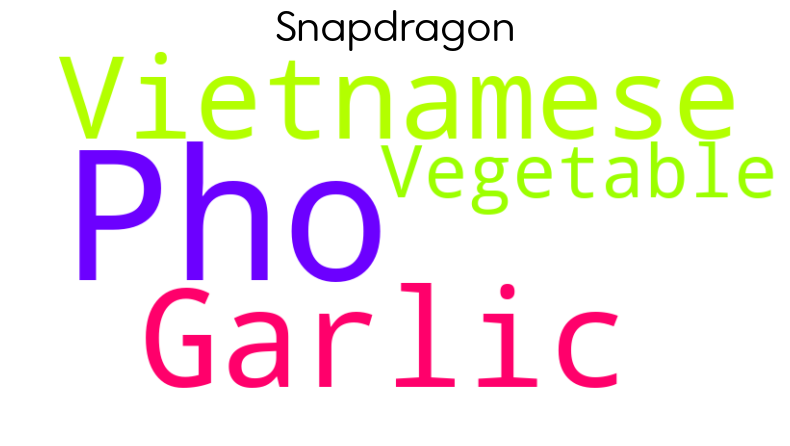

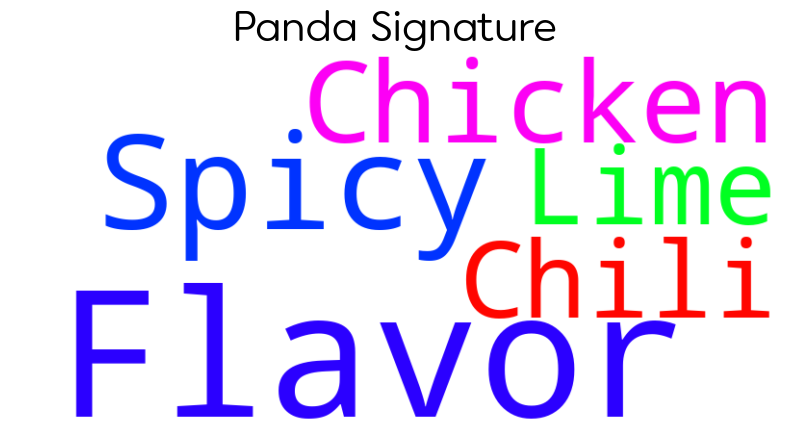

In [888]:
print_keyword('Simply Asia','F'),print_keyword("Annie Chun's",'F'),
print_keyword('Lee Kum Kee','F'),print_keyword("Snapdragon",'F'),
print_keyword('Panda Signature','F')

In [889]:
## F등급의 라면 
top_keyword = []
for i in US_RD1.loc[US_RD1['Stars_val']=='F']['Variety']:
    a=i.split(' ')
    for h in a:
        top_keyword.append(h)

In [890]:
# 키워드 삭제
while 'Ramen' in top_keyword:
    top_keyword.remove('Ramen')
while 'Noodle' in top_keyword:
    top_keyword.remove('Noodle')
while 'Noodles' in top_keyword:
    top_keyword.remove('Noodles')
while 'Soup' in top_keyword:
    top_keyword.remove('Soup')
while 'Style' in top_keyword:
    top_keyword.remove('Style')

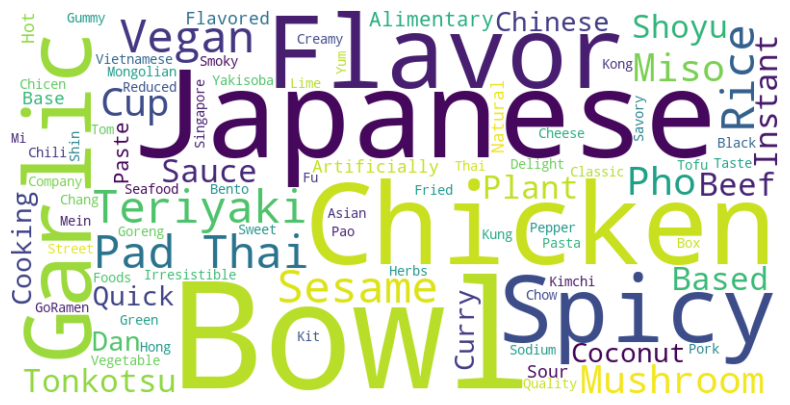

In [891]:
text = ' '.join(top_keyword)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [892]:
## D등급의 라면 
top_keyword = []
for i in US_RD1.loc[US_RD1['Stars_val']=='D']['Variety']:
    a=i.split(' ')
    for h in a:
        top_keyword.append(h)

In [893]:
# 키워드 삭제
while 'Ramen' in top_keyword:
    top_keyword.remove('Ramen')
while 'Noodle' in top_keyword:
    top_keyword.remove('Noodle')
while 'Noodles' in top_keyword:
    top_keyword.remove('Noodles')
while 'Soup' in top_keyword:
    top_keyword.remove('Soup')
while 'Style' in top_keyword:
    top_keyword.remove('Style')

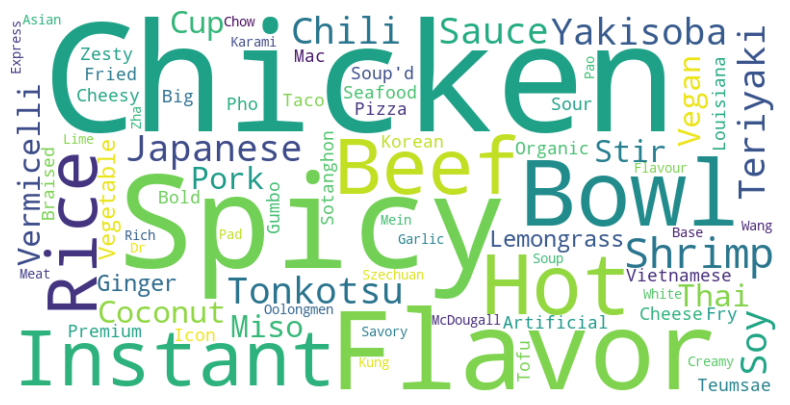

In [894]:
text = ' '.join(top_keyword)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [895]:
# 결론
# 한스 리네시는 라면에 점수를 후하게 줌. 그러나 호불호가 확실한 것으로 보임.
# 각 등급별로 업체 라면을 분석해본 결과 특정업체가 높은 점수를 받은 것이 확인되고 특히 한국과 일본이 높은 점수를 받음. 그러나 미국 라면 시장을 타겟으로 잡게 되면
# 매운 정도를 세분화하여 한국과 일본에서 인기있는 제품의 공통점과 특색을 찾아서 제품을 출시하면 시장에서 경쟁력을 가질 것으로 판단됨.
